# Binary Coco Polyfill

Code to read a Coco based json file and fill in color white for all segmentations found and fill in color black for all others.

In [10]:
import cv2
import json
import numpy as np
from matplotlib import pyplot as plt

In [18]:
config = json.load(open("coco-config.json"))

print(config["images"][0])

{'id': 1, 'width': 861, 'height': 494, 'file_name': 'cctv.png'}


In [14]:
config = json.load(open("coco-config.json"))

img = cv2.imread("cctv.png")

segs = []

for ann in config["annotations"]:
    segs.append(ann["segmentation"])
print(segs)

[[[577.9602272727273, 7.639204545454549, 609.4090909090909, 30.70170454545455, 608.0113636363636, 64.2471590909091, 583.5511363636364, 97.79261363636364, 578.6590909090909, 111.07102272727273, 597.5284090909091, 130.63920454545456, 550.0056818181818, 169.7755681818182, 546.5113636363636, 215.9005681818182, 542.3181818181818, 231.2755681818182, 548.6079545454545, 245.2528409090909, 530.4375, 255.73579545454547, 505.97727272727275, 285.7869318181818, 483.6136363636364, 338.9005681818182, 455.6590909090909, 397.6051136363637, 452.8636363636364, 303.9573863636364, 464.04545454545456, 265.5198863636364, 481.51704545454544, 243.15625, 485.71022727272725, 207.51420454545453, 486.4090909090909, 170.4744318181818, 492.6988636363636, 134.13352272727272, 492.6988636363636, 108.97443181818183, 530.4375, 101.28693181818183, 524.8465909090909, 74.03125, 528.3409090909091, 45.377840909090914, 531.8352272727273, 27.906250000000004, 549.3068181818181, 12.531250000000004]], [[455.6590909090909, 431.1505

In [3]:
segs = [np.array(seg, np.int32).reshape((1, -1, 2))
            for seg in segs]

In [4]:
for seg in segs: cv2.drawContours(img, seg, -1, (0,255,0), 2)

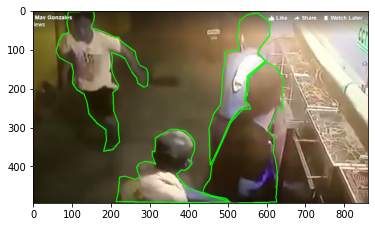

In [5]:
img2 = img[:,:,::-1]
plt.imshow(img)

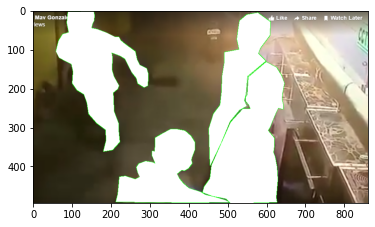

In [6]:
cv2.fillPoly(img, segs, color=(255,255,255))
plt.imshow(img)

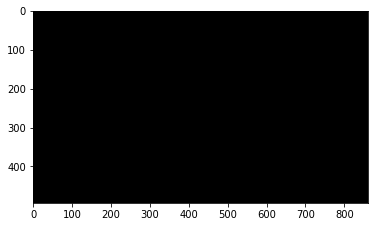

In [8]:
result = np.zeros(img.shape, dtype=np.uint8)
plt.imshow(result)

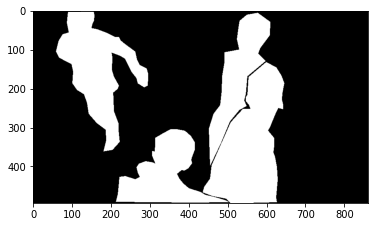

In [9]:
cv2.fillPoly(result, segs, color=(255,255,255))
plt.imshow(result)